## 출처 [https://www.kaggle.com/code/sonawanelalitsunil/youtube-comments-sentiment-trends-ml-74-90](https://www.kaggle.com/code/sonawanelalitsunil/youtube-comments-sentiment-trends-ml-74-90)

In [1]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('YoutubeCommentsDataSet.csv')
df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [4]:
df.tail()

,Comment,Sentiment
18403,i really like the point about engineering tool...,positive
18404,i’ve just started exploring this field and thi...,positive
18405,excelente video con una pregunta filosófica pr...,neutral
18406,hey daniel just discovered your channel a coup...,positive
18407,this is great focus is key a playful approach ...,positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18364 non-null  object
 1   Sentiment  18408 non-null  object
dtypes: object(2)
memory usage: 287.8+ KB


In [7]:
df.describe()

,Comment,Sentiment
count,18364,18408
unique,17871,3
top,one of the best thing about dude is that he ne...,positive
freq,10,11432


In [9]:
df.isnull().sum()

Comment      44
Sentiment     0
dtype: int64

In [10]:
df.corr

<bound method DataFrame.corr of                                                  Comment Sentiment
0      lets not forget that apple pay in 2014 require...   neutral
1      here in nz 50 of retailers don’t even have con...  negative
2      i will forever acknowledge this channel with t...  positive
3      whenever i go to a place that doesn’t take app...  negative
4      apple pay is so convenient secure and easy to ...  positive
...                                                  ...       ...
18403  i really like the point about engineering tool...  positive
18404  i’ve just started exploring this field and thi...  positive
18405  excelente video con una pregunta filosófica pr...   neutral
18406  hey daniel just discovered your channel a coup...  positive
18407  this is great focus is key a playful approach ...  positive

[18408 rows x 2 columns]>

In [11]:
df["Comment"] = df["Comment"].astype(str)

In [12]:
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", '', text)
    text = re.sub(r"\d+", "", text)
    
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df["cleaned_comment"] = df["Comment"].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sdh05\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df.isnull().sum()

Comment            0
Sentiment          0
cleaned_comment    0
dtype: int64

In [15]:
df.columns

Index(['Comment', 'Sentiment', 'cleaned_comment'], dtype='object')

## Data visualization

In [16]:
from wordcloud import WordCloud
from collections import Counter

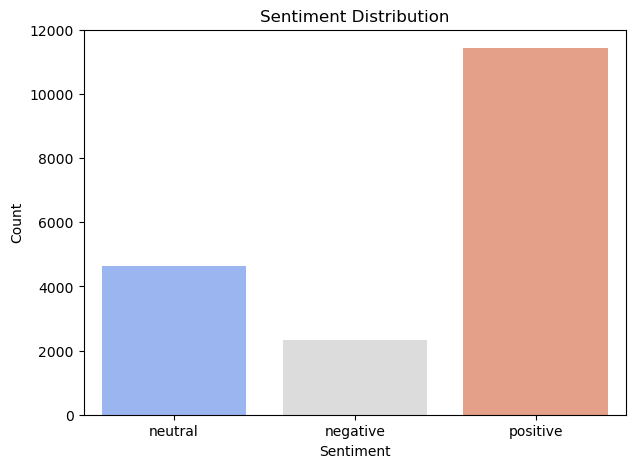

In [17]:
plt.figure(figsize=(7, 5))
sns.countplot(x=df["Sentiment"], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

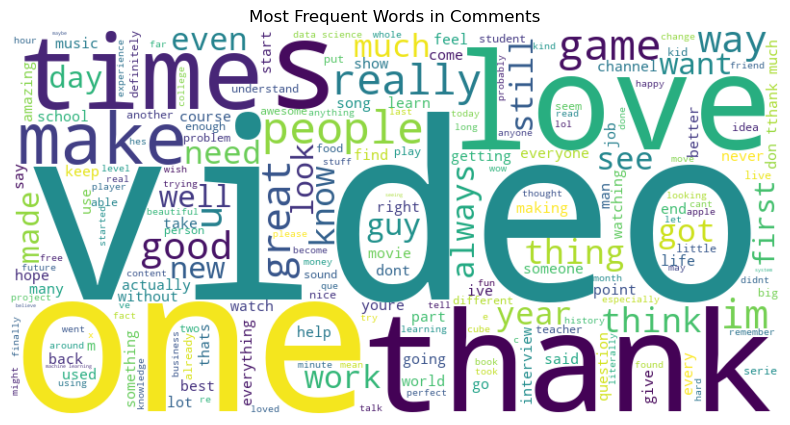

In [18]:
all_words = " ".join(df["cleaned_comment"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Comments")
plt.show()

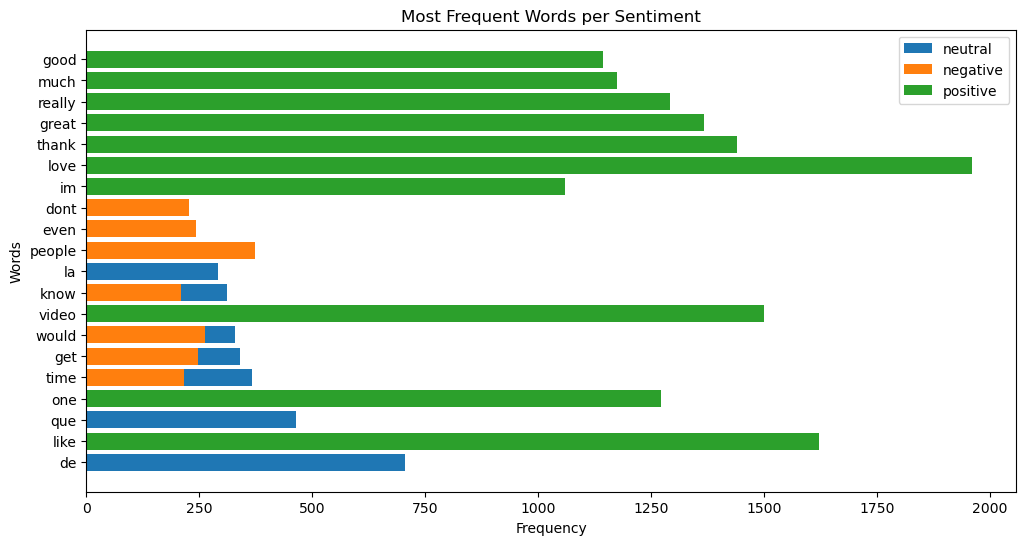

In [19]:
# Sentiment-wise Most Frequent Words
plt.figure(figsize=(12, 6))
for sentiment in df["Sentiment"].unique():
    words = " ".join(df[df["Sentiment"] == sentiment]["cleaned_comment"])
    most_common = Counter(words.split()).most_common(10)
    words, counts = zip(*most_common)
    
    plt.barh(words, counts, label=sentiment)

plt.legend()
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Most Frequent Words per Sentiment")
plt.show()

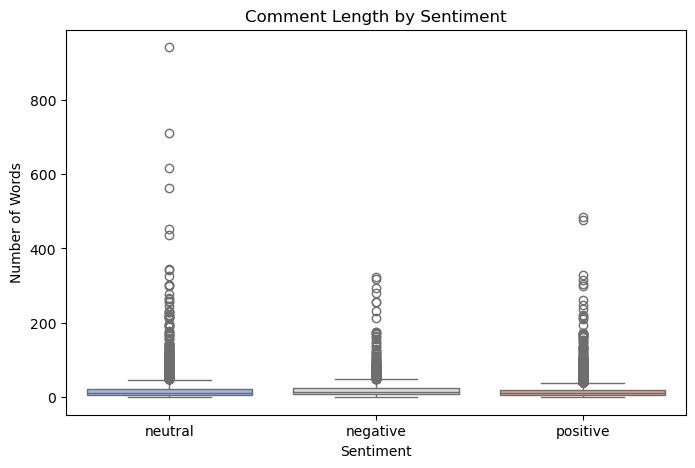

In [20]:
# Comment Length vs. Sentiment
df["comment_length"] = df["cleaned_comment"].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Sentiment"], y=df["comment_length"], palette="coolwarm")
plt.title("Comment Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Words")
plt.show()

### ML algorithm

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["cleaned_comment"])
y = df["Sentiment"]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=537)

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Define models
models = {
    "Naive Bayes" : MultinomialNB(),
    "Logistic Regression" : LogisticRegression(max_iter = 2000),
    "Random Forest" : RandomForestClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    "SVM" : SVC(kernel='linear')
}

In [27]:
from sklearn.metrics import accuracy_score, classification_report

best_model = None
best_accuracy = 0
best_model_name = ""
results = {}

print("\nModel Performance Sumary\n"+"-"*30)
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"{name}: Accuracy={accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

#Display best model
print('\nBest Model')
print(f"{best_model_name} with Accuracy: {best_accuracy:.4f}")


Model Performance Sumary
------------------------------
Naive Bayes: Accuracy=0.6521
Logistic Regression: Accuracy=0.7501
Random Forest: Accuracy=0.7268
Gradient Boosting: Accuracy=0.6515
SVM: Accuracy=0.7534

Best Model
SVM with Accuracy: 0.7534


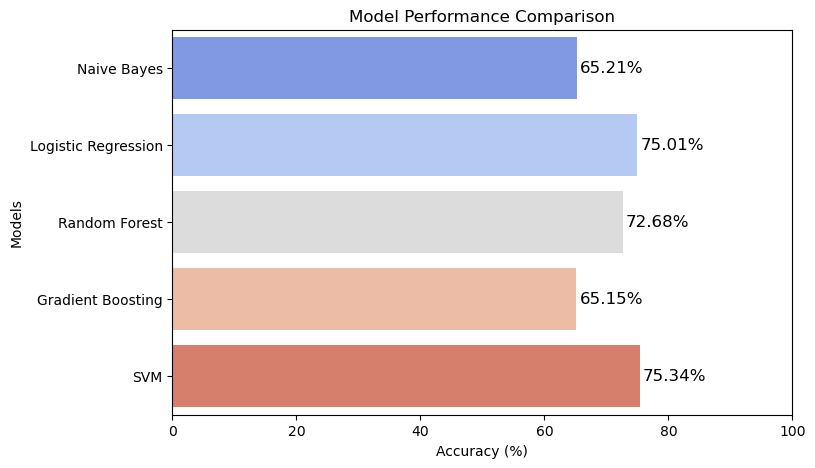

In [28]:
model_names = list(results.keys())
accuracies = [acc * 100 for acc in results.values()]

plt.figure(figsize=(8, 5))
sns.barplot(x=accuracies, y=model_names, palette="coolwarm")

for index, value in enumerate(accuracies):
    plt.text(value + 0.5, index, f"{value:.2f}%", va="center", fontsize=12)

plt.xlabel("Accuracy (%)")
plt.ylabel("Models")
plt.title("Model Performance Comparison")
plt.xlim(0, 100)  
plt.show()